### **TRABAJO PRÁCTICO N° 2: Modelo predictivo de lluvia en Australia**
---
 2do cuatrimestre - Año 2025

| **Integrantes**           | **Legajo** |
|---------------------------|------------|
| Casado, Gustavo.          | C-7296/6   |
| Martinez Dufour, Caterina | M-7169/2   |

**Docentes:** *Joel Spak* - *Agustín Almada* - *Bruno Cocitto López*

**Fecha límite de entrega item 1, 2, 3:** 21/10

**Fecha límite de entrega item 4, 5, 6, 7:** 07/11

**Fecha límite de entrega item 8, 9, 10, 11:** 29/11

### Descripción del dataset
---
En este trabajo, nuestro objetivo es **predecir futuros dias donde llovera en Australia**.  El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no en la columna ‘RainTomorrow’. El objetivo del trabajo práctico es armar un ejecutable de Docker para predecir, a las 23:59:59hs de cada día, si el día siguiente va a llover o no.


#### Variables del conjunto de datos  

**Variables explicativas:**  
- **Date**: Fecha en la que se registraron los datos.
- **Location**: Nombre de la zona donde se obtuvo la observación.
- **MinTemp**: Temperatura mínima en grados (°C).
- **MaxTemp**: Temperatura máxima en grados (°C).
- **Rainfall**: Precipitación en milímetros (mm).
- **Evaporation**: Cantidad de agua evaporada en milímetros (mm).
- **Sunshine**: 
- **WindGustDir**:  Dirección del viento.
- **WindGustSpeed**: Velocidad del viento (km/h).
- **WindDir9am**: Dirección del viento a las 9am
- **WindDir3pm**: Dirección del viento a las 3pm
- **WindSpeed9am**: Velocidad del viento a las 9am (km/h).
- **WindSpeed3pm**: Velocidad del viento a las 3pm (km/h).
- **Humidity9am**: Humedad relativa a las 9am (%).
- **Humidity3pm**:  Humedad relativa a las 3pm (%).
- **Pressure9am**: Presión atmosférica a las 9am (hPa).
- **Pressure3pm**: Presión atmosférica a las 3pm (hPa).
- **Cloud9am**: Cantidad de cielo cubierto con nubes a las 9am (octas).
- **Cloud3pm**: Cantidad de cielo cubierto con nubes a las 3pm (octas).
- **Temp9am**: Temperatura a las 9am (°C).
- **Temp3pm**: Temperatura a las 3pm (°C).
- **RainToday**:  Indicador si llovió ese dia (Yes/No)

**Variable objetivo (target):**  
- **RainTomorrow**: Indica si llovió al día siguiente (Yes/No)

In [1]:
# Librerías
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

### Carga del dataset
---

Se utilizó la biblioteca pandas para leer los datos almacenados en el archivo CSV y convertirlos en un DataFrame. Para corroborar que los datos se hayan cargado correctamente, se visualizaron las primeras cinco filas mediante el método '.head()'. Además, se empleó el método '.info()' para obtener información general del dataset, verificar que el tipo de dato en cada variable es correcto, detectar la presencia de valores nulos y valores atípicos.

In [15]:
# Carga del dataset
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path)

In [16]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Transformación de clusters de ciudades a una nueva categoría "Regiones"
---

Se  solicita  en  primera  instancia  crear  clusters  con  las  ciudades del Dataset para 
catalogarlas en otra categoría: regiones. La cantidad de regiones será definida por 
cada  grupo,  observarlas  en  un  gráfico  de  latitud  y  longitud  para  acompañar  la 
decisión. (obtuve los datos de longitud y latitud en 'www.latlong.net')

In [17]:
len(df['Location'].unique())

49

In [18]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [19]:
renombrar = { 
    "BadgerysCreek": "Badgerys Creek", "CoffsHarbour": "Coffs Harbour", "NorahHead" : "Norah Head", "NorfolkIsland" : "Norfolk Island", "SydneyAirport": "Sydney Airport",
    "WaggaWagga" : "Wagga Wagga", "MountGinini": "Mount Ginini", "MelbourneAirport" : "Melbourne Airport", "Nhil" : "Nhill", "GoldCoast" : "Gold Coast", 
    "MountGambier" : "Mount Gambier", "PerthAirport" : "Perth Airport", "SalmonGums" : "Salmon Gums", "AliceSprings" : "Alice Springs", "PearceRAAF" : "RAFF Base Pearce"
}

# Renombra los nombres del dataset
df["Location"] = df["Location"].replace(renombrar)

In [20]:
coordenadas = {
    "Albury": (-36.073730, 146.913544), "Badgerys Creek": (-33.887421, 150.740509), "Cobar": (-31.494930, 145.840164), "Coffs Harbour": (-30.298613, 153.109390),
    "Moree": (-29.463551, 149.841721), "Newcastle": (-32.926670, 151.780014), "Norah Head": (-33.283340, 151.566116), "Norfolk Island": (-29.040834, 167.954712),
    "Penrith": (-33.752918, 150.690674), "Richmond": (-42.735809, 147.437088), "Sydney": (-33.868820, 151.209290), "Sydney Airport": (-33.939922, 151.175278),
    "Wagga Wagga": (-35.114750, 147.369614), "Williamtown": (-32.814999, 151.842773), "Wollongong": (-34.427811, 150.893066), "Canberra": (-35.280937, 149.130005),
    "Tuggeranong": (-35.424400, 149.088806), "Mount Ginini": (-37.828410, 140.780656), "Ballarat": (-37.562160, 143.850250), "Bendigo": (-36.759338, 144.283997),
    "Sale": (-38.107250, 147.067291), "Melbourne Airport": (-37.670528, 144.848938), "Melbourne": (-37.813629, 144.963058), "Mildura": (-34.210468, 142.142044),
    "Nhill": (-36.332472, 141.649494), "Portland": (-38.342281, 141.603958), "Watsonia": (-37.711699, 145.082002), "Dartmoor": (-37.919090, 141.274673),
    "Brisbane": (-27.470030, 153.022980), "Cairns": (-16.918550, 145.778061), "Gold Coast": (-28.001499, 153.428467), "Townsville": (-19.258965, 146.816956),
    "Adelaide": (-34.927170, 138.599533), "Mount Gambier": (-37.828411, 140.780655), "Nuriootpa": (-34.471859, 138.996216), "Woomera": (-31.200684, 136.825919),
    "Albany": (-35.023819, 117.884727), "Witchcliffe": (-34.025699, 115.100107), "RAFF Base Pearce": (-17.591089, 123.777382), "Perth Airport": (-31.932739, 115.960258),
    "Perth": (-31.950527, 115.860458), "Salmon Gums": (-32.982075, 121.644170), "Walpole": (-34.976129, 116.731910), "Hobart": (-42.881901, 147.323807),
    "Launceston": (-41.437019, 147.139389), "Alice Springs": (-23.700680, 133.880707), "Darwin": (-12.463440, 130.845642), "Katherine": (-14.464970, 132.264267),
    "Uluru": (-25.344427, 131.036880)
}

In [ ]:
df['Latitud'] = df['Location'].map(lambda x: coordenadas.get(x, (None, None))[0])
df['Longitud'] = df['Location'].map(lambda x: coordenadas.get(x, (None, None))[1])

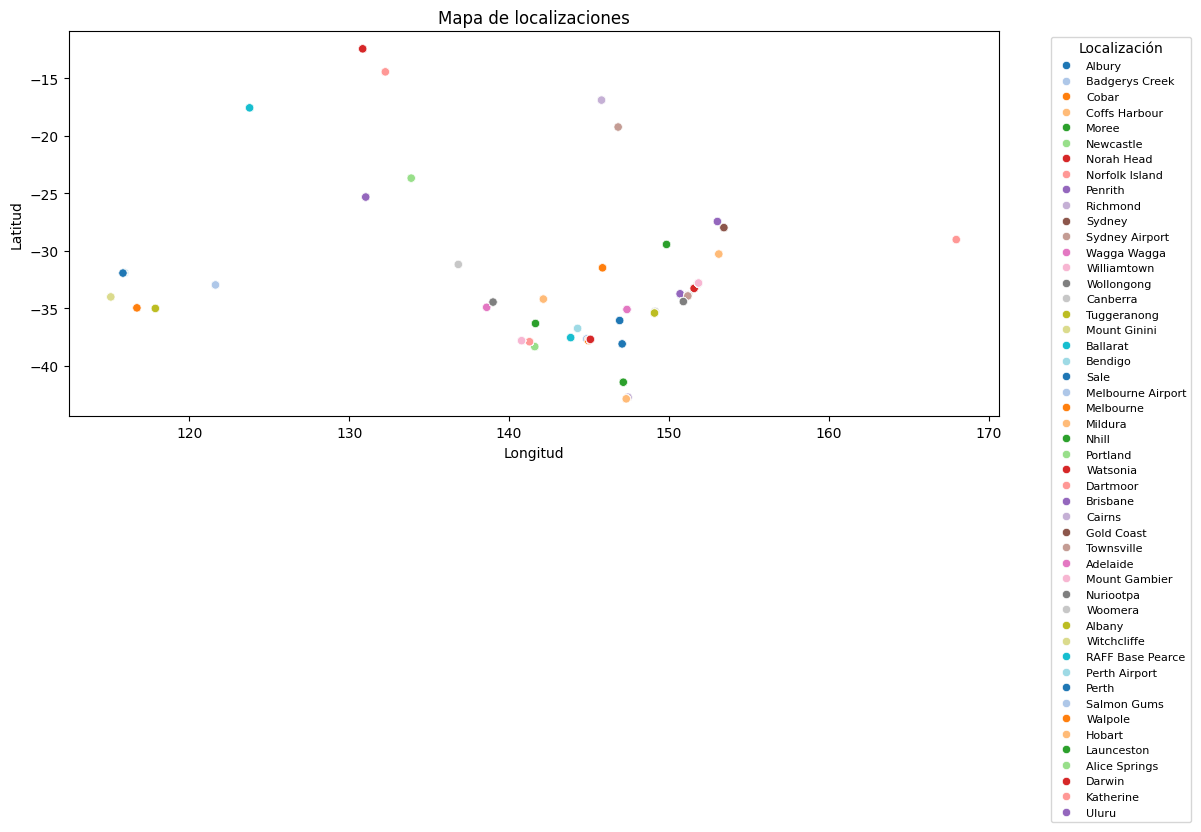

In [22]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Longitud', y='Latitud', data=df, hue='Location', palette='tab20')
plt.title('Mapa de localizaciones')
plt.legend(title="Localización", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.show()

Para determinar el número óptimo de regiones en las que se agrupan las zonas donde se tomaron datos sobre la lluvia, se empleó el método del Codo. Este método utiliza k-means para un rango de valores de k y calcula la inercia para cada iteración. Para saber que valor seleccionar, observamos el gráfico del codo

In [23]:
X = df[['Latitud', 'Longitud']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

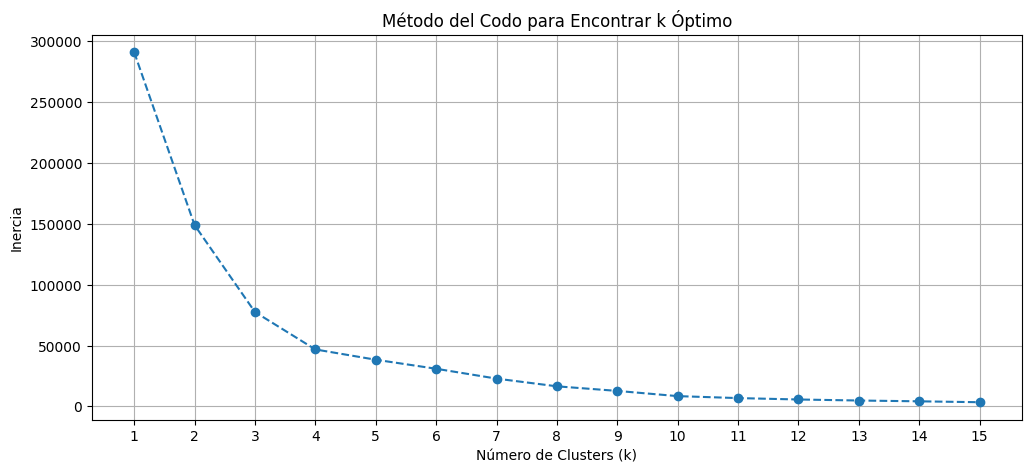

In [ ]:
inertias = []
max_k = 15

# Calculamos la inercia para cada k
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(15,4))
plt.plot(range(1, max_k + 1), inertias, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Encontrar k Óptimo')
plt.grid(True)
plt.xticks(range(1, max_k + 1))
plt.show()

Este método muestra que hay un quiebre en k = 4 debido a que se ve una caída fuerte hasta este valor y luego el descenso es mucho más leve. Es por esta razón que podemos concluir que el valor optimo para dividir las localizaciones será en 4 regiones (norte, sur, este y oeste).

In [44]:
kmeans = KMeans(n_clusters = 4, random_state=42, n_init = 10)
df['Regiones'] = kmeans.fit_predict(X_scaled)

In [46]:
etiqueta = {0: 'Sur', 1: 'Norte', 2: 'Este', 3: 'Oeste'}
df['Regiones'] = df['Regiones'].map(etiqueta)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitud,Longitud,Region,Regiones
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,No,-36.07373,146.913544,9,Sur
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,No,-36.07373,146.913544,9,Sur
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,No,-36.07373,146.913544,9,Sur
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,No,-36.07373,146.913544,9,Sur
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,-36.07373,146.913544,9,Sur


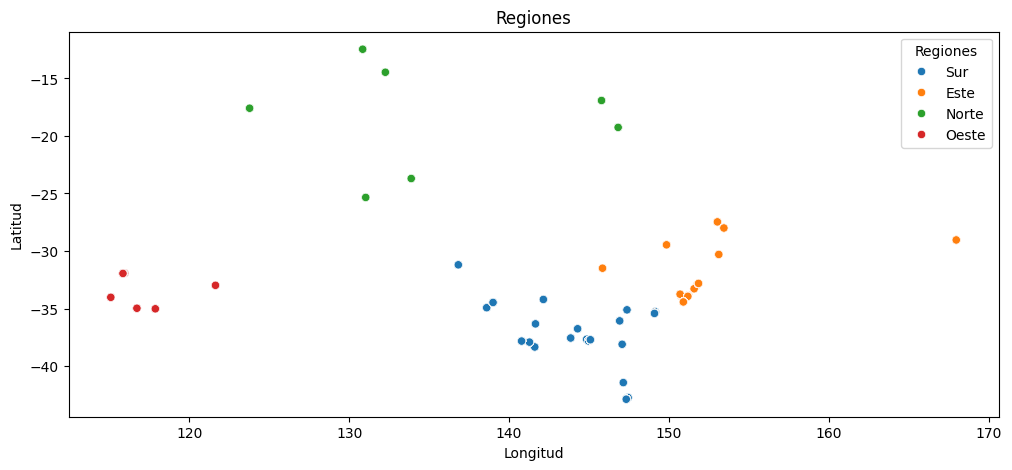

In [48]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="Longitud", y="Latitud", hue="Regiones", data=df, palette="tab10")
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title(f'Regiones')
plt.legend(title="Regiones")
plt.show()

### Analisis descriptivo
---

Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una  de  las  variables  involucradas,  detallando:  características,  comportamiento  y 
rango de variación. ¿Qué es cada variable?. Debe incluir: 

●  Análisis y decisión sobre datos faltantes. 

●  Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja) 

●  ¿Está balanceado el dataset? ¿Por qué cree que hacemos esta pregunta? 

●  Codificación de variables categóricas (si se van a utilizar para predicción). 

●  Matriz de correlación de variables. 

●  Estandarización/escalado de datos. 

●  Validación cruzada train - test. Realizar una división del conjunto de datos en  conjuntos  de  entrenamiento  y  prueba  (y  si  se  quiere,  se  puede  incluir  validación, que luego será útil) en el MOMENTO donde lo crean adecuado